In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import numpy as np
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import glob
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras import regularizers

import io
import requests
import os
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping
import glob

Using TensorFlow backend.


In [2]:
# fix random seed for reproducibility
np.random.seed(7)
# ENCODING = 'utf-8'

In [3]:
allfiles = glob.glob('dataset/*.csv')
df = pd.concat((pd.read_csv(f) for f in allfiles))

C:\Users\Susmit\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  
C:\Users\Susmit\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  
C:\Users\Susmit\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  


In [4]:
def expand_categories(values):
    result = []
    s = values.value_counts()
    t = float(len(values))
    for v in s.index:
        result.append("{}: count= {}, {}%".format(v,s[v],round(100*(s[v]/t),2)))
    return "[{}]".format(",".join(result))
        
def analyze(df):
    cols = df.columns.values
    total = float(len(df))

    print("{} rows".format(int(total)))
    for col in cols:
        uniques = df[col].unique()
        unique_count = len(uniques)
        if unique_count>100:
            print("** {}:{} ({}%)".format(col,unique_count,int(((unique_count)/total)*100)))
        else:
            print("** {}:{}".format(col,expand_categories(df[col])))
            expand_categories(df[col])

In [5]:
analyze(df)

1312819 rows
** Flow ID:544344 (41%)
**  Source IP:10178 (0%)
**  Source Port:63456 (4%)
**  Destination IP:11793 (0%)
**  Destination Port:41797 (3%)
**  Protocol:[6: count= 995189, 75.81%,17: count= 317158, 24.16%,0: count= 472, 0.04%]
**  Timestamp:26713 (2%)
**  Flow Duration:612475 (46%)
**  Total Fwd Packets:786 (0%)
**  Total Backward Packets:1007 (0%)
** Total Length of Fwd Packets:11185 (0%)
**  Total Length of Bwd Packets:31282 (2%)
**  Fwd Packet Length Max:4059 (0%)
**  Fwd Packet Length Min:257 (0%)
**  Fwd Packet Length Mean:56229 (4%)
**  Fwd Packet Length Std:98387 (7%)
** Bwd Packet Length Max:4168 (0%)
**  Bwd Packet Length Min:466 (0%)
**  Bwd Packet Length Mean:68336 (5%)
**  Bwd Packet Length Std:90217 (6%)
** Flow Bytes/s:798793 (60%)
**  Flow Packets/s:696280 (53%)
**  Flow IAT Mean:660996 (50%)
**  Flow IAT Std:503685 (38%)
**  Flow IAT Max:364737 (27%)
**  Flow IAT Min:67272 (5%)
** Fwd IAT Total:288028 (21%)
**  Fwd IAT Mean:343877 (26%)
**  Fwd IAT Std:321184

In [6]:
dataset = df.values
y = dataset[:,84]

In [7]:
df[['Source IP1','Source IP2','Source IP3', 'Source IP4']] = df[' Source IP'].str.split('.', expand=True)
df[['Destination IP1','Destination IP2','Destination IP3', 'Destination IP4']] = df[' Destination IP'].str.split('.', expand=True)

df = df.drop(' Source IP', axis=1)
df = df.drop(' Destination IP', axis=1)

df = df.drop('Flow ID', axis=1)
df = df.drop(' Timestamp', axis=1)
df = df.drop(' Flow Packets/s', axis=1)
df = df.drop('Flow Bytes/s', axis=1)

df = df.drop('Fwd Avg Bytes/Bulk', axis=1)
df = df.drop(' Fwd Avg Packets/Bulk', axis=1)
df = df.drop(' Fwd Avg Bulk Rate', axis=1)
df = df.drop(' Bwd Avg Bytes/Bulk', axis=1)
df = df.drop(' Bwd Avg Packets/Bulk', axis=1)
df = df.drop('Bwd Avg Bulk Rate', axis=1)

df = df.drop(' Bwd PSH Flags', axis=1)
df = df.drop(' Bwd URG Flags', axis=1)

df = df.drop(' Label', axis = 1)

df[['Source IP1','Source IP2','Source IP3', 'Source IP4', 'Destination IP1','Destination IP2','Destination IP3', 'Destination IP4']] = df[['Source IP1','Source IP2','Source IP3', 'Source IP4', 'Destination IP1','Destination IP2','Destination IP3', 'Destination IP4']].apply(pd.to_numeric)
df.apply(pd.to_numeric, errors='ignore')

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,Idle Max,Idle Min,Source IP1,Source IP2,Source IP3,Source IP4,Destination IP1,Destination IP2,Destination IP3,Destination IP4
0,42544,8080,6,60202640,9,9,322.0,256.0,322.0,0.0,...,10200000.0,10100000.0,192,168,10,12,52,6,13,28
1,42544,8080,6,57891,1,1,0.0,0.0,0.0,0.0,...,0.0,0.0,192,168,10,12,52,6,13,28
2,1841,8080,6,134812,4,3,206.0,134.0,194.0,0.0,...,0.0,0.0,192,168,10,9,205,174,165,73
3,8080,1841,6,84,1,1,6.0,6.0,6.0,6.0,...,0.0,0.0,205,174,165,73,192,168,10,9
4,1845,8080,6,127781,4,3,206.0,134.0,194.0,0.0,...,0.0,0.0,192,168,10,9,205,174,165,73
5,8080,1845,6,33,1,1,6.0,6.0,6.0,6.0,...,0.0,0.0,205,174,165,73,192,168,10,9
6,1846,8080,6,165810,5,4,212.0,140.0,194.0,0.0,...,0.0,0.0,192,168,10,9,205,174,165,73
7,1847,8080,6,65033,4,3,1870.0,134.0,1858.0,0.0,...,0.0,0.0,192,168,10,9,205,174,165,73
8,8080,1846,6,42,1,1,6.0,6.0,6.0,6.0,...,0.0,0.0,205,174,165,73,192,168,10,9
9,8080,1847,6,29,1,1,6.0,6.0,6.0,6.0,...,0.0,0.0,205,174,165,73,192,168,10,9


In [8]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
print(encoded_Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
print(dummy_y)

[1 1 1 ..., 3 3 3]
[[ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [15]:
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(
    scaled_df, dummy_y, test_size=0.2, random_state=42)

In [17]:
# Create neural net
model = Sequential()
model.add(Dense(10, input_dim=scaled_df.shape[1], activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.add(Dense(dummy_y.shape[1], activation='softmax'))

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

In [20]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=2,epochs=30)

Train on 1050255 samples, validate on 262564 samples
Epoch 1/30
 - 159s - loss: 0.2133 - acc: 0.9289 - val_loss: 0.1412 - val_acc: 0.9485
Epoch 2/30
 - 155s - loss: 0.1278 - acc: 0.9518 - val_loss: 0.1131 - val_acc: 0.9657
Epoch 3/30
 - 156s - loss: 0.1124 - acc: 0.9611 - val_loss: 0.1055 - val_acc: 0.9690
Epoch 4/30
 - 104s - loss: 0.1045 - acc: 0.9662 - val_loss: 0.0970 - val_acc: 0.9711
Epoch 5/30
 - 101s - loss: 0.0996 - acc: 0.9686 - val_loss: 0.0934 - val_acc: 0.9703
Epoch 6/30
 - 158s - loss: 0.0966 - acc: 0.9700 - val_loss: 0.0941 - val_acc: 0.9717
Epoch 7/30
 - 159s - loss: 0.0932 - acc: 0.9715 - val_loss: 0.0882 - val_acc: 0.9725
Epoch 8/30
 - 128s - loss: 0.0904 - acc: 0.9726 - val_loss: 0.0885 - val_acc: 0.9731
Epoch 9/30
 - 159s - loss: 0.0884 - acc: 0.9735 - val_loss: 0.0849 - val_acc: 0.9729
Epoch 10/30
 - 154s - loss: 0.0868 - acc: 0.9739 - val_loss: 0.1276 - val_acc: 0.9586
Epoch 11/30
 - 160s - loss: 0.0860 - acc: 0.9742 - val_loss: 0.0883 - val_acc: 0.9735
Epoch 12/3

In [21]:
import matplotlib.pyplot as plt
from keras.callbacks import History

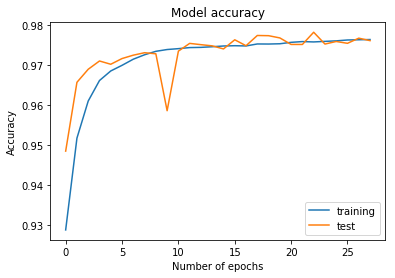

In [22]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of epochs')
plt.legend(['training', 'test'], loc='lower right')
plt.show()

In [23]:
# Measure accuracy
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(y_test,axis=1)
score = metrics.accuracy_score(y_eval, pred)
print("Validation score: {}".format(score))

Validation score: 0.9761543852165567


In [24]:
from sklearn.metrics import precision_score

In [44]:
precision_score(y_eval, pred, average='macro')

C:\Users\Susmit\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.60386595187940151

In [26]:
from keras.models import model_from_json

In [27]:
# save model to JSON
model_json = model.to_json()
with open("model_mk5.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_mk5.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# load json and create model
json_file = open('model_mk3.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_mk3.h5")
print("Loaded model from disk") 

In [51]:
test_data = pd.read_csv("dataset/test/Tuesday.csv")

C:\Users\Susmit\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [52]:
dataset_test = test_data.values
test_y = dataset_test[:,84]

In [53]:
#Data preprocessing
test_data[['Source IP1','Source IP2','Source IP3', 'Source IP4']] = test_data[' Source IP'].str.split('.', expand=True)
test_data[['Destination IP1','Destination IP2','Destination IP3', 'Destination IP4']] = test_data[' Destination IP'].str.split('.', expand=True)

test_data = test_data.drop(' Source IP', axis=1)
test_data = test_data.drop(' Destination IP', axis=1)

test_data = test_data.drop('Flow ID', axis=1)
test_data = test_data.drop(' Timestamp', axis=1)
test_data = test_data.drop(' Flow Packets/s', axis=1)
test_data = test_data.drop('Flow Bytes/s', axis=1)

test_data = test_data.drop('Fwd Avg Bytes/Bulk', axis=1)
test_data = test_data.drop(' Fwd Avg Packets/Bulk', axis=1)
test_data = test_data.drop(' Fwd Avg Bulk Rate', axis=1)
test_data = test_data.drop(' Bwd Avg Bytes/Bulk', axis=1)
test_data = test_data.drop(' Bwd Avg Packets/Bulk', axis=1)
test_data = test_data.drop('Bwd Avg Bulk Rate', axis=1)

test_data = test_data.drop(' Bwd PSH Flags', axis=1)
test_data = test_data.drop(' Bwd URG Flags', axis=1)

test_data[['Source IP1','Source IP2','Source IP3', 'Source IP4', 'Destination IP1','Destination IP2','Destination IP3', 'Destination IP4']] = test_data[['Source IP1','Source IP2','Source IP3', 'Source IP4', 'Destination IP1','Destination IP2','Destination IP3', 'Destination IP4']].apply(pd.to_numeric)
test_data.apply(pd.to_numeric, errors='ignore')
test_data = test_data.drop(' Label', axis = 1)
# dataset_test = test_data.values

# test_x = dataset_test[:,0:78]
scaler = preprocessing.MinMaxScaler()
scaled_test_x = scaler.fit_transform(test_data)

In [54]:
# encode class values as integers
encoder_test = LabelEncoder()
encoder_test.fit(test_y)
encoded_test_y = encoder_test.transform(test_y)
# print(encoded_test_y)

# convert integers to dummy variables (i.e. one hot encoded)
dummy_test_y = np_utils.to_categorical(encoded_test_y)
# print(dummy_test_y)

In [55]:
# Measure test accuracy
pred_test = model.predict(scaled_test_x)
# print(pred_test)
pred_test = np.argmax(pred_test,axis=1)
print(pred_test)
test_y_eval = np.argmax(dummy_test_y,axis=1)
print(test_y_eval)
score_test = metrics.accuracy_score(test_y_eval, pred_test)
print("Validation score: {}".format(score_test))

[0 0 0 ..., 0 0 0]
[0 0 0 ..., 0 0 0]
Validation score: 0.9684823585081261
